# **WIDHYA MISSION 2**
# **Mission : Flight Delay Prediction**

# **Problem Statement**: You are recruited as a ML engineer for an XYZ Airline Company. The biggest problem there is unable to predict Flight Delay and this caused company to huge losses. The last chance for the company is you. Are you ready to get started and helps your company to get into profits?

# **Import the necessary libraries**

In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# **Read the dataset and preview**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import the dataset and read it
path = '/content/drive/MyDrive/Colab Notebooks/flights.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flights.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# **Information about the dataset**

In [5]:
df.head ()  ## Prints the top 5 rows of the dataset

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()  ##Prints the bottom 5 rows of the dataset

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,14.0,15.0,14.0,28.0,221.0,208.0,189.0,1576,437.0,5.0,440,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()  ## Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [8]:
df.describe() ## Describe the statistics of the dataframe

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,1.135116e+02,8.223565e+02,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,7.223082e+01,6.077843e+02,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,1.440000e+02,1.062000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [9]:
df.shape ## Shape of the dataset

(5819079, 31)

# **Subsetting 100000 rows for analysis**

In [15]:
df = df[0:100000]

# **Unique counts of 'DIVERTED' columns, wheather 0 indicate Not Diverted and 1 is Diverted.**

In [16]:
df.value_counts('DIVERTED')

DIVERTED
0    99776
1      224
dtype: int64

# **Jointplot of   'SCHEDULED_ARRIVAL' and 'ARRIVAL_TIME'**

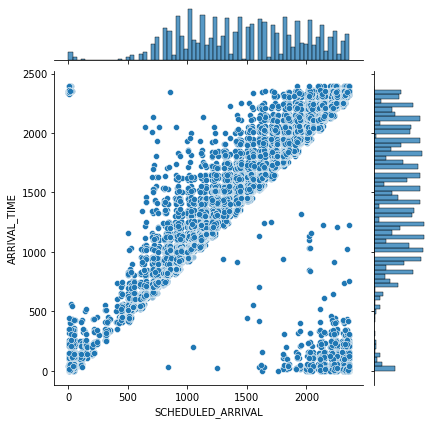

In [18]:
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

# **Study Of Correlation**

In [19]:
df.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.497084,0.004412,-0.138130,-0.124369,0.060064,0.093451,-0.119781,-0.026285,-0.018470,-0.036330,-0.035208,-0.095731,0.037407,-0.110820,-0.091687,0.070770,0.004847,-0.006000,0.097693,-0.010550,-0.001603,0.033213,0.061960
DAY_OF_WEEK,NaN,NaN,-0.497084,1.000000,0.010955,0.046914,0.045182,0.055632,0.007291,0.044150,0.019755,0.029025,0.030678,0.024666,0.013749,-0.017789,0.031725,0.011477,0.067520,-0.000709,-0.006409,-0.019626,0.008156,0.003648,0.033729,-0.050835
FLIGHT_NUMBER,NaN,NaN,0.004412,0.010955,1.000000,-0.003027,0.010140,0.034863,0.061010,0.016377,-0.337801,-0.318819,-0.339135,-0.356196,-0.003670,0.014464,-0.018891,0.000753,0.056163,0.007155,0.090008,-0.032564,-0.007260,0.023770,0.076581,0.004246
SCHEDULED_DEPARTURE,NaN,NaN,-0.138130,0.046914,-0.003027,1.000000,0.943186,0.174254,-0.081496,0.912232,-0.019873,-0.025744,-0.011993,0.000321,0.585786,-0.027502,0.731240,0.552653,0.154951,0.002515,-0.002631,-0.112393,-0.017957,-0.054419,0.186286,-0.042004
DEPARTURE_TIME,NaN,NaN,-0.124369,0.045182,0.010140,0.943186,1.000000,0.243960,-0.070081,0.966477,-0.031873,-0.035204,-0.024384,-0.016562,0.618850,-0.017759,0.734970,0.584615,0.223654,0.006576,0.009679,-0.093096,-0.012820,-0.013304,0.247325,-0.046406
DEPARTURE_DELAY,NaN,NaN,0.060064,0.055632,0.034863,0.174254,0.243960,1.000000,0.061905,0.231399,0.005868,0.015257,0.002733,0.004591,0.090696,0.040285,0.155150,0.079639,0.950838,0.020787,0.030862,0.085794,0.008040,0.606954,0.605289,0.210402
TAXI_OUT,NaN,NaN,0.093451,0.007291,0.061010,-0.081496,-0.070081,0.061905,1.000000,-0.043114,0.096191,0.215749,0.077234,0.057871,-0.045096,0.009041,-0.062325,-0.045611,0.245363,0.009810,0.010763,0.407371,-0.008021,-0.024674,-0.129879,0.119412
WHEELS_OFF,NaN,NaN,-0.119781,0.044150,0.016377,0.912232,0.966477,0.231399,-0.043114,1.000000,-0.038173,-0.038217,-0.031646,-0.027282,0.642358,-0.015089,0.744697,0.608611,0.217344,0.006524,0.001293,-0.085582,-0.013912,-0.017376,0.223010,-0.055273


# **Correlation of features with 'ARRIVAL_DELAY':**

In [20]:
df[df.columns[1:]].corr()['ARRIVAL_DELAY'][:].sort_values(ascending=False)

ARRIVAL_DELAY          1.000000
DEPARTURE_DELAY        0.950838
AIRLINE_DELAY          0.592718
LATE_AIRCRAFT_DELAY    0.572956
AIR_SYSTEM_DELAY       0.259700
TAXI_OUT               0.245363
WEATHER_DELAY          0.235906
DEPARTURE_TIME         0.223654
WHEELS_OFF             0.217344
TAXI_IN                0.170073
SCHEDULED_DEPARTURE    0.154951
SCHEDULED_ARRIVAL      0.140565
WHEELS_ON              0.088131
ARRIVAL_TIME           0.076791
DAY                    0.070770
DAY_OF_WEEK            0.067520
FLIGHT_NUMBER          0.056163
ELAPSED_TIME           0.048448
SECURITY_DELAY         0.006070
AIR_TIME              -0.002742
SCHEDULED_TIME        -0.022043
DISTANCE              -0.023821
MONTH                       NaN
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_DELAY, dtype: float64

# **Remove the unwanted columns**

In [21]:
df=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT', 'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME', 'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'], axis=1)

## **Check for null values in the dataset**

In [22]:
df.isna().sum()

MONTH                      0
DAY                        0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_DELAY         2298
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2440
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

In [23]:
df.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

## **Replacing the null values with the mean values**

In [24]:
df=df.fillna(df.mean())

In [25]:
df.isna().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

## **Construction of Confusion Matrix using heatmap**

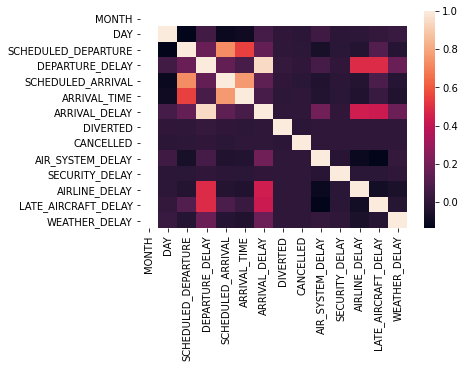

In [27]:
sns.heatmap(df.corr())

There are no dependent variable yet which serves as our result wheather flight is delayed or not.

Creation of a feature called result' which takes the value 0 and 1. O for the resulting flight is not delayed and 1 for flight delayed.
Here I'using the condition that  if 'ARRIVAL_DELAY' is greater than 15 then we will get 1 else 0

In [29]:
result = []
for row in df['ARRIVAL_DELAY']:
  if row > 15 :
    result.append(1)
  else:
      result.append(0)

In [30]:
df['result']= result

In [31]:
df.head()  # Observe the top 5 rows after adding result

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [32]:
df['result'].value_counts()

0    63779
1    36221
Name: result, dtype: int64

# **Model Building**

# **Selecting only following columns for Model Building.**
'MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY', 'result'

In [33]:
df=df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
df.columns

Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'result'],
      dtype='object')

##**Splitting Dataset into Training and Testing with 70:30 ratio and with random_state = 42**

In [34]:
df = df.values
X, y = df[:,:-1], df[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## **Feature Scaling**

In [35]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

# **Creating the Decision Tree Classifier**

In [36]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [37]:
pred = clf.predict_proba(X_test)

# **Model Prediction**

In [38]:
# AUC Score of the model
auc_score = roc_auc_score(y_test, pred[:,1])
auc_score

0.9979843202457034

In [39]:
print('AUC Score of Model is: {} %'.format(round(auc_score*100,2)))

AUC Score of Model is: 99.8 %


## **Confusion Matrix**

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = confusion_matrix(y_test, pred[:,1])
print("Confusion Matrix:")
print(result1)
print('')

Confusion Matrix:
[[19121    19]
 [   33 10827]]



## **Classification Report**

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result2 = classification_report(y_test, pred[:,1])
print("Classification Report:",)
print (result2)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19140
         1.0       1.00      1.00      1.00     10860

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



## **Accuracy Score**

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
result3 = accuracy_score(y_test,pred[:,1])
print("Accuracy:",result3)

Accuracy: 0.9982666666666666


Text(0.5, 257.44, 'Predicted label')

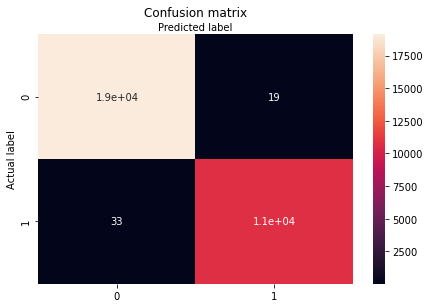

In [45]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(result1), annot=True,)## visualized confusion matrix using heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **ROC Curve of Decision Tree Classifier**

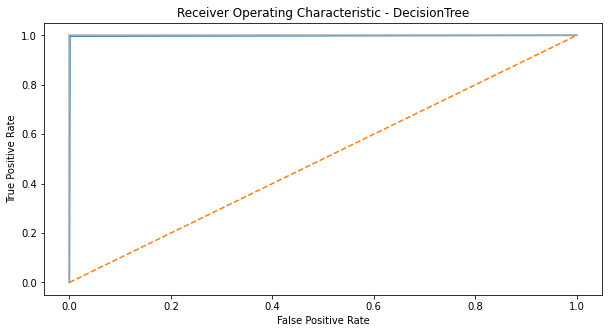

In [47]:
plt.subplots(1, figsize=(10,5))
plt.title('Receiver Operating Characteristic - DecisionTree')
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Calculation Of Accuracy, Precision and Recall**

In [48]:
print("Accuracy Achieved:",round(metrics.accuracy_score(y_test, pred[:,1])*100,2),'%')
print(' ')
print("Precision Achieved:",round(metrics.precision_score(y_test, pred[:,1])*100,2),'%')
print(' ')
print("Recall Achieved:",round(metrics.recall_score(y_test, pred[:,1])*100,2),'%')

Accuracy Achieved: 99.83 %
 
Precision Achieved: 99.82 %
 
Recall Achieved: 99.7 %


# **Thank You !!**